In [395]:
import numpy as np
import pandas as pd
import statsmodels.tsa as tsa
from statsmodels.tsa.vector_ar.var_model import VAR, FEVD
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf, kpss
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#import mvts_utils as utils
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in the data

In [406]:
import os
os.getcwd()

'/home/ruchella/slow_waves_2023/src/playground'

In [410]:
import h5py
file_name = '../../data/jid_playground/jid_eeg.h5'

In [411]:
h5py.File(file_name)

<HDF5 file "jid_eeg.h5" (mode r)>

In [416]:
df1 = pd.DataFrame(np.array(h5py.File(file_name)['eeg/bin1530']))
df1 = df1.dropna()

In [415]:
df1.head(10)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  
7  0.0  0.0  0.0  0.0  
8  0.0  0.0  0.0  0.0  
9  0.0  0.0  0.0  0.0

In [10]:
df1.T.iloc[0].head(10)

0   -5.010096
1   -4.491299
2   -3.945387
3   -3.355640
4   -2.704514
5   -1.979359
6   -1.176286
7   -0.294545
8    0.660938
9    1.678143
Name: 0, dtype: float64

In [417]:
# remove the ocular electrodes
data_df = df1.iloc[:,0:62]

In [422]:
# load the sw logical indexes
df2 = pd.DataFrame(np.array(h5py.File(file_name)['sw/bin1530']))
df2 = df2.dropna()

# Explore data

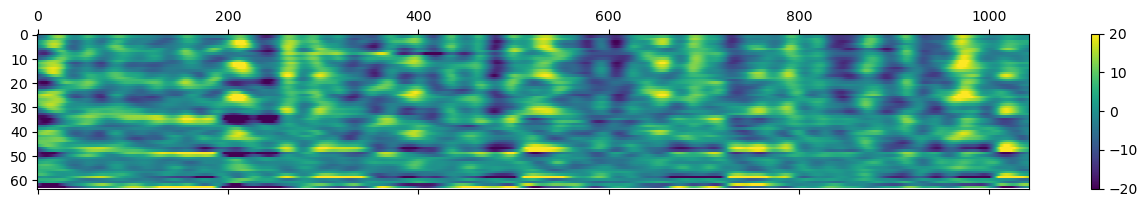

In [251]:
im = plt.matshow(df1.T,aspect ='auto', vmin=-20, vmax=20)
plt.colorbar()
plt.show()

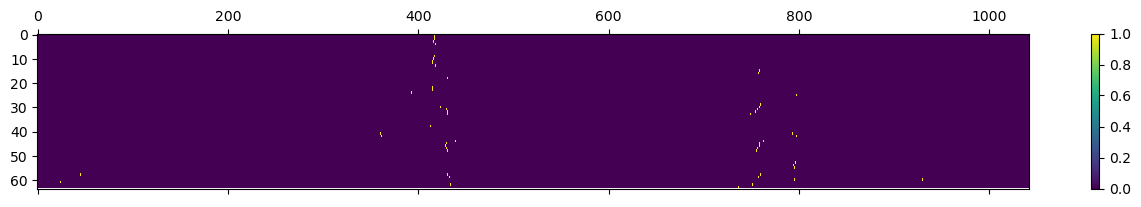

In [443]:
im = plt.matshow(df2.T,aspect ='auto', vmin=-0, vmax=1)
plt.colorbar()
plt.show()

In [ ]:
fig,ax = plt.subplots(16,4, figsize=(15,15), sharex=True)
df1.plot(color='k',ax=ax, subplots=True)
plt.show()

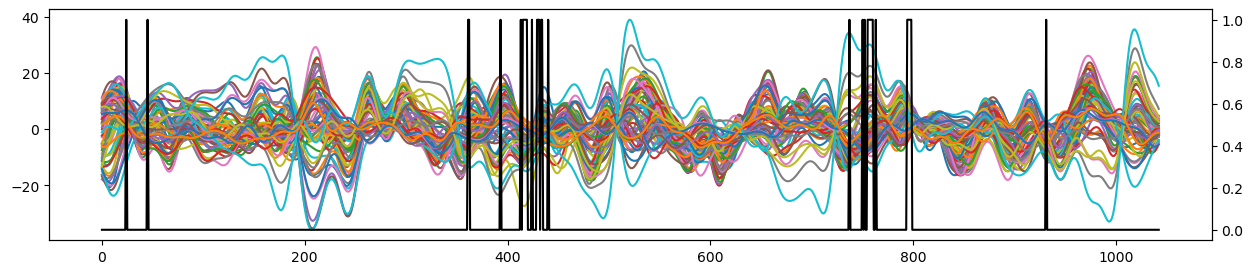

In [459]:
fig,ax = plt.subplots(figsize=(15,3), sharex=True)
for i in range(62):
    ax.plot(df1[i])

ax2 = ax.twinx() 
ax2.plot(df2.T.any(), 'k')
plt.show()

# Check if the variables are correlated at different time lags

## Correlation/covariance between electrodes

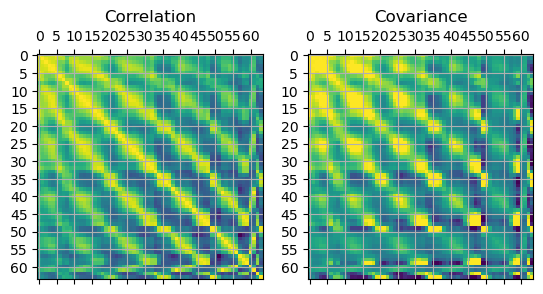

In [150]:
corr = np.corrcoef(data_df.T)
fig, (ax1, ax2) = plt.subplots(1,2)
im = ax1.matshow(corr,aspect ='equal', vmin=-1, vmax=1)
ax1.set_xticks(np.arange(0,64,5))
ax1.set_yticks(np.arange(0,64,5))
ax1.grid(which='both')
#fig.colorbar(im)
ax1.set_title(label='Correlation')
fig.show()

covv = np.cov(data_df.T)
im = ax2.matshow(covv,aspect ='equal', vmin=-50, vmax=50)
ax2.set_xticks(np.arange(0,64,5))
ax2.set_yticks(np.arange(0,64,5))
ax2.grid(which='both')
#fig.colorbar(im)
ax2.set_title(label='Covariance')
fig.show()


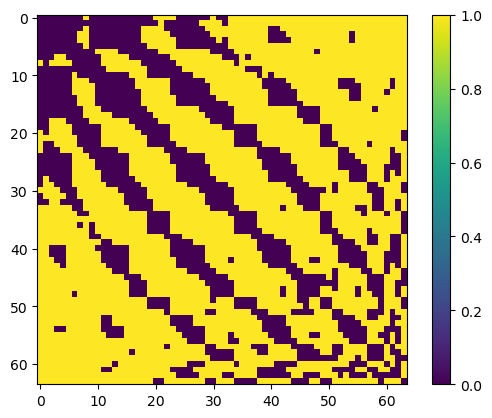

In [174]:
plt.imshow(corr_mask)
plt.colorbar()
plt.show()

## Cross correlation

In [480]:
cross_corr_df = np.zeros((df1.shape[0],64,64))
for chan1 in range(63):
    for chan2 in range(63):
        cross_corr_df[:,chan1,chan2] = ccf(df1[chan1],df1[chan2], unbiased=False)

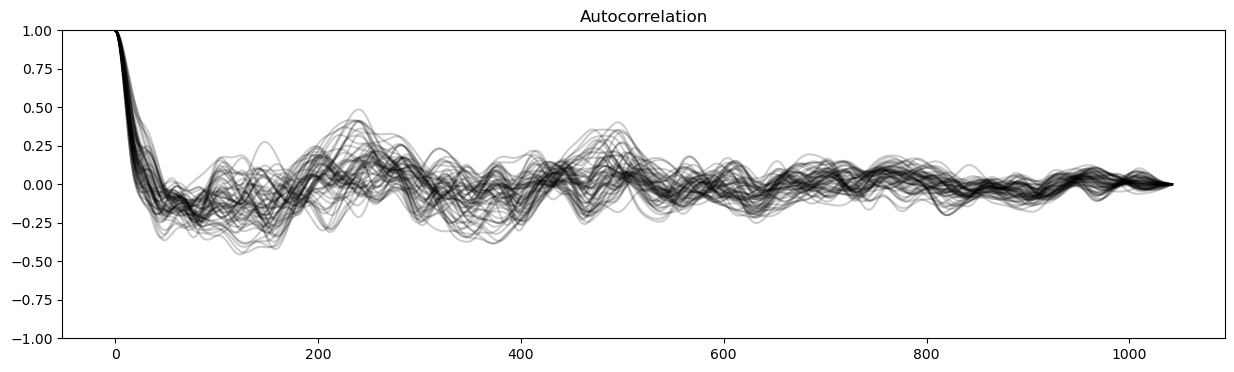

In [500]:
fig,ax = plt.subplots(figsize=(15, 4), sharex=True, sharey=True)
for i in range(63):
    ax.plot(cross_corr_df[:,i,i], 'k', alpha=0.2)
    ax.set_ylim(-1, 1)
    ax.set_title('Autocorrelation')

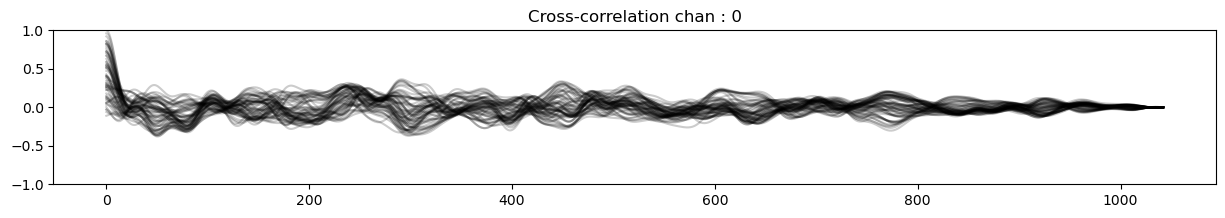

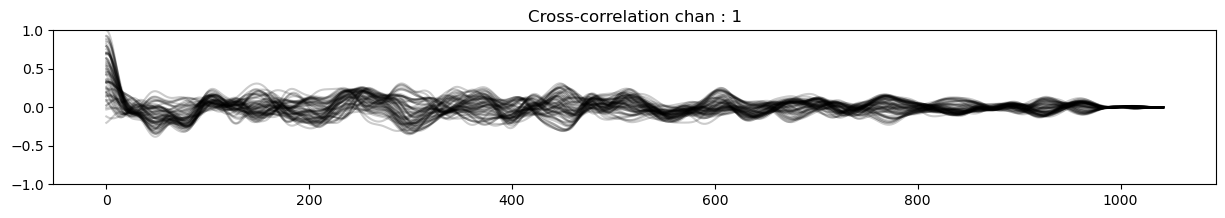

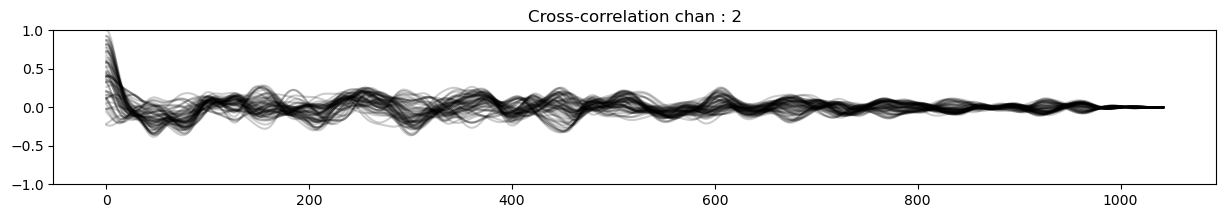

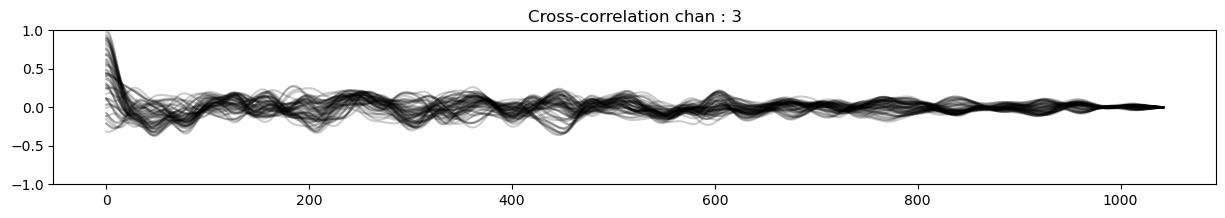

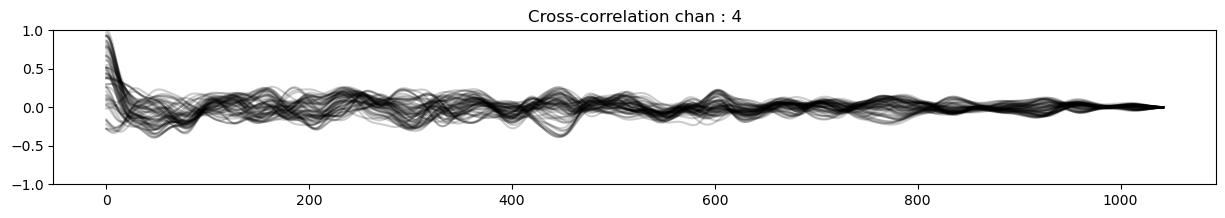

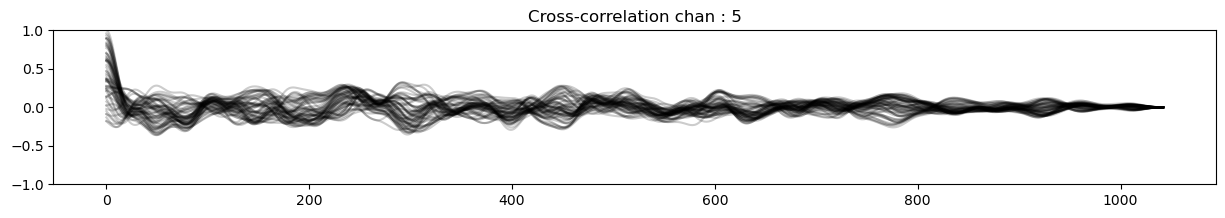

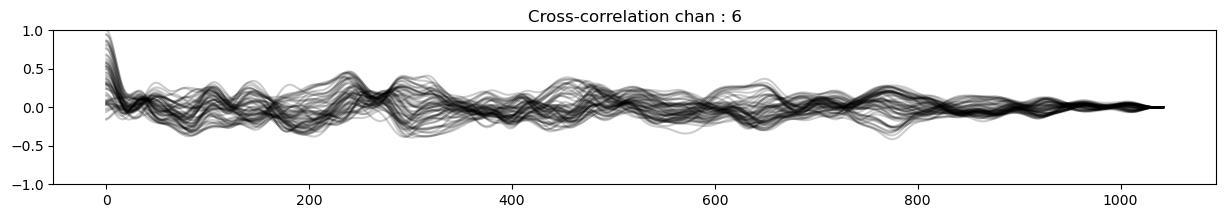

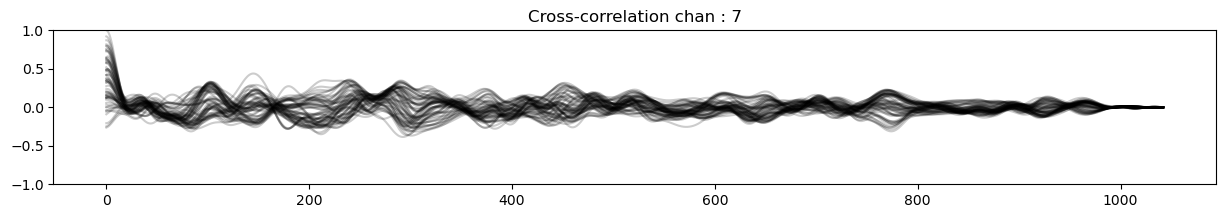

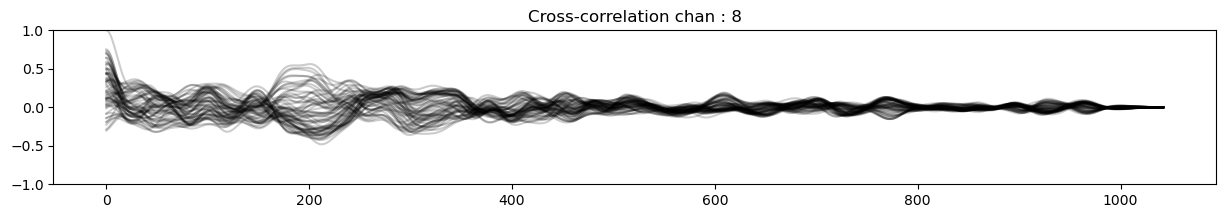

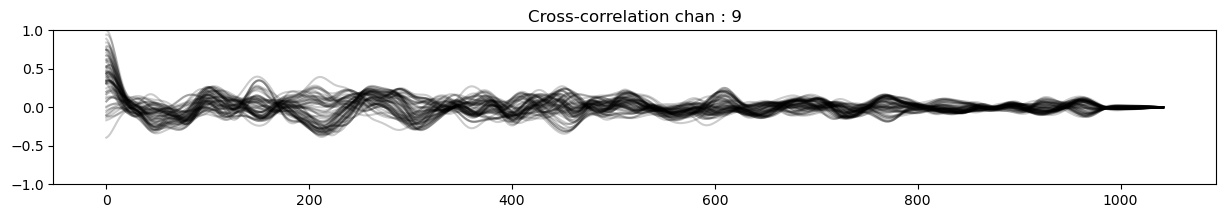

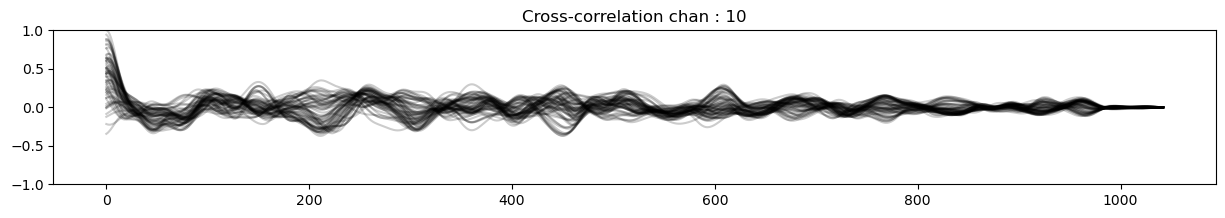

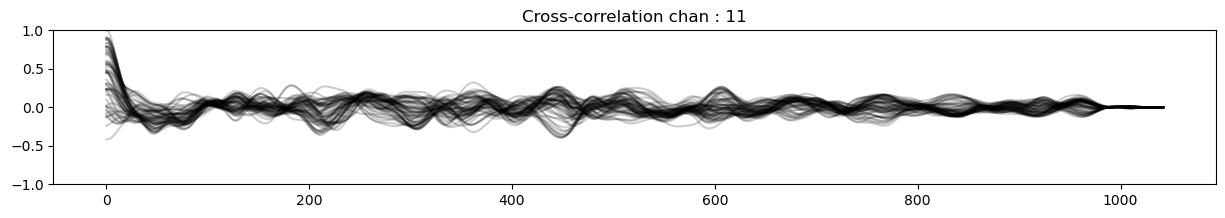

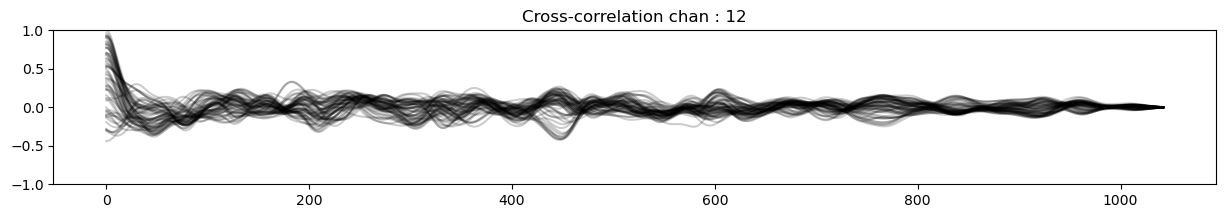

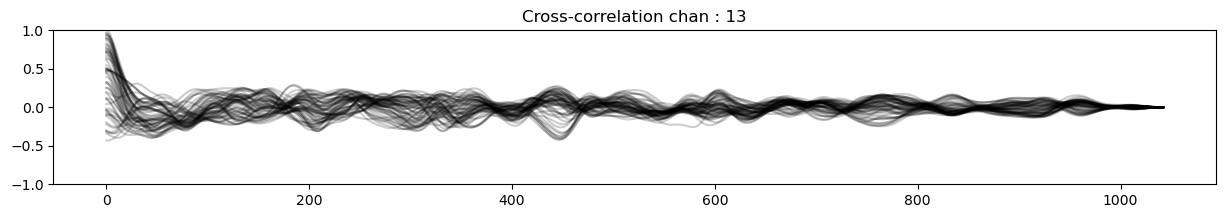

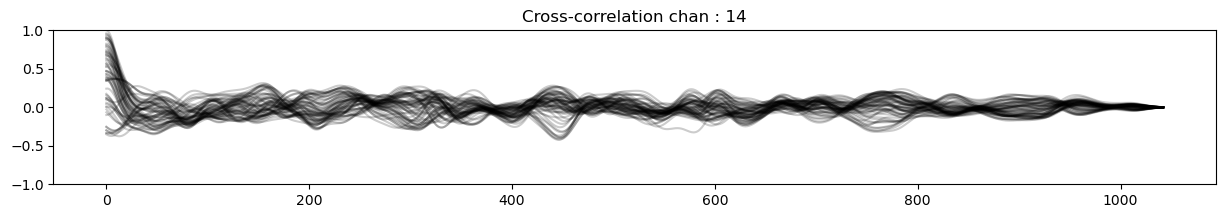

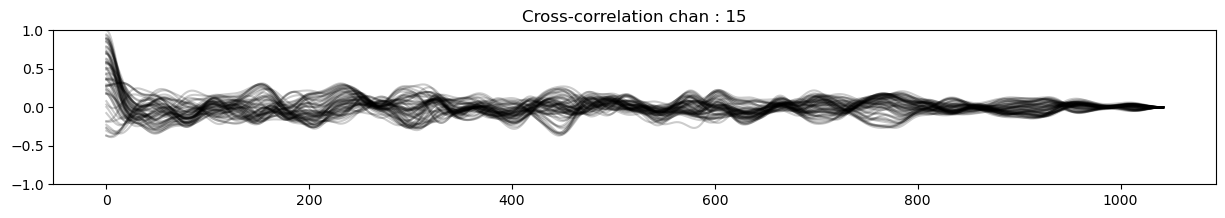

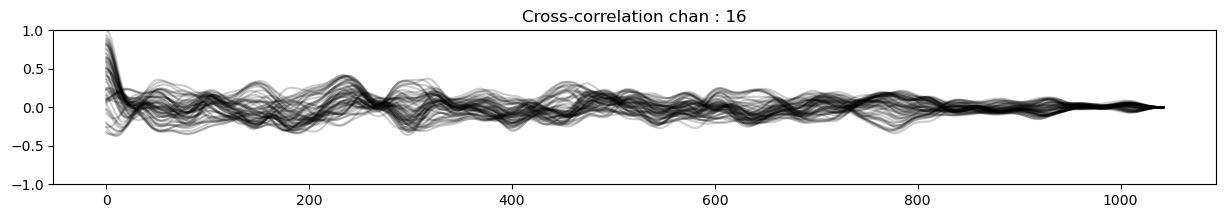

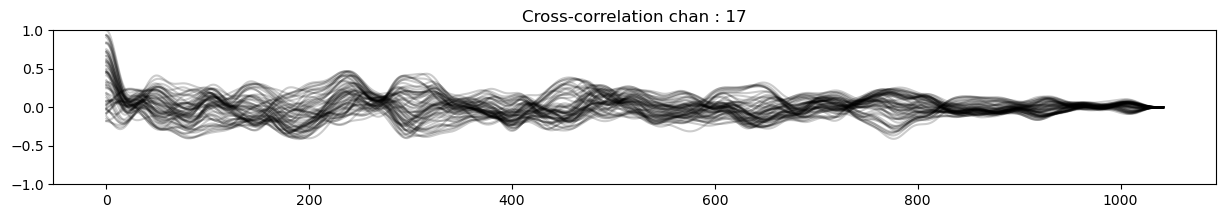

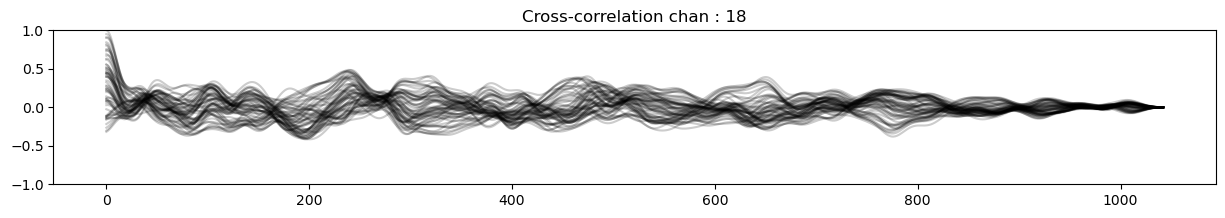

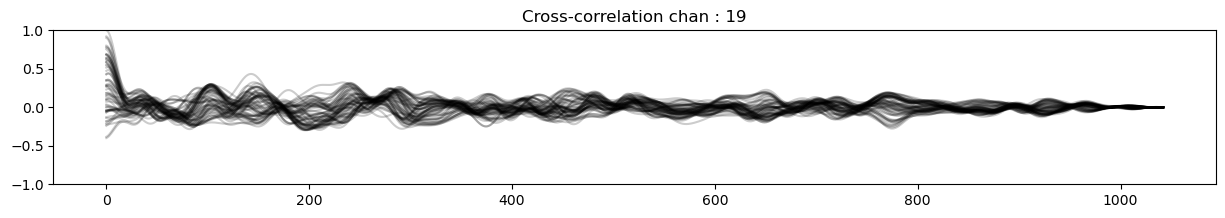

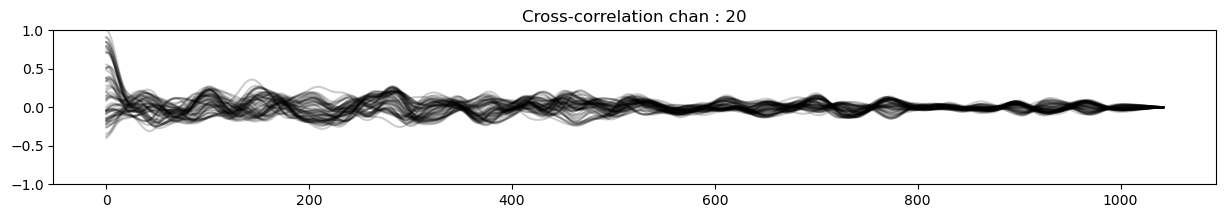

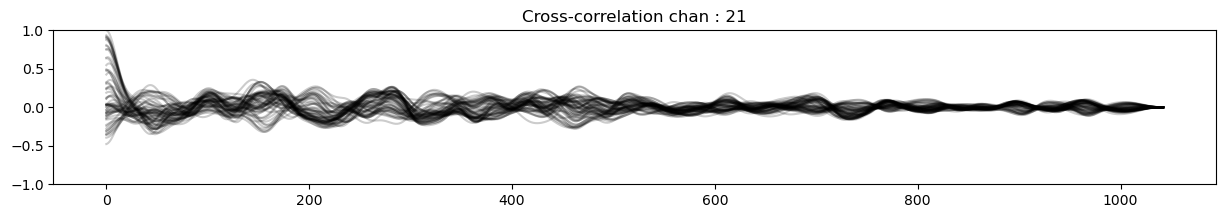

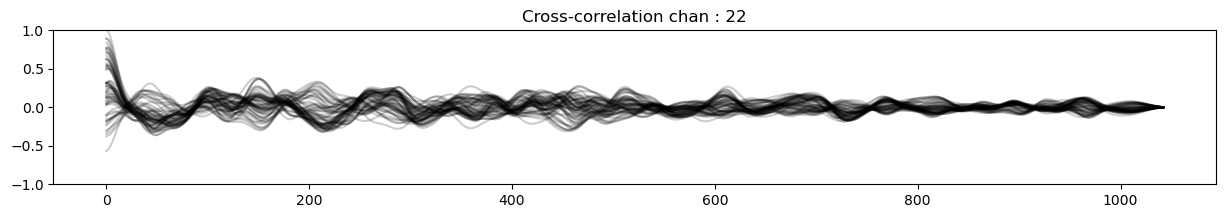

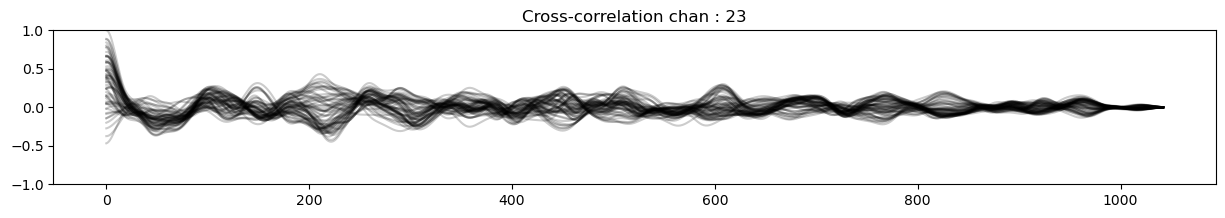

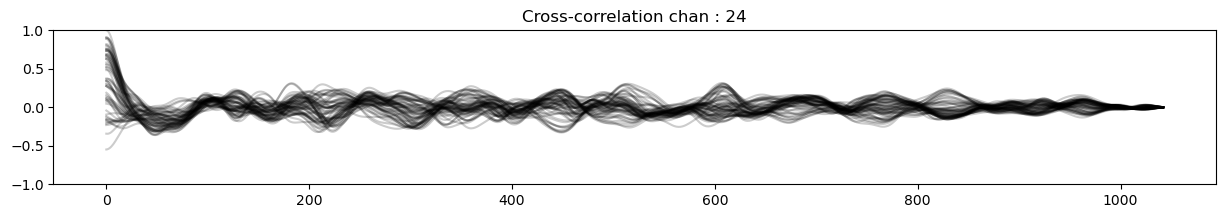

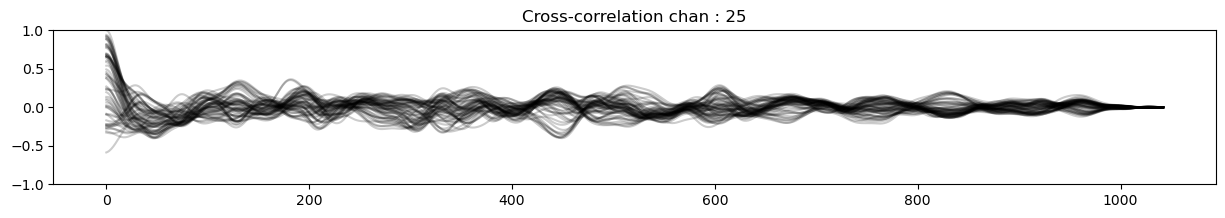

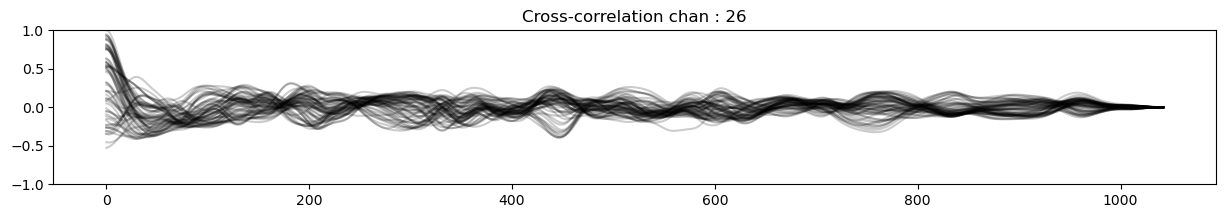

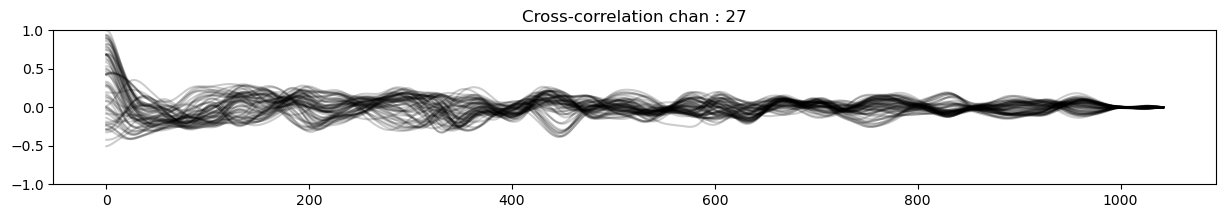

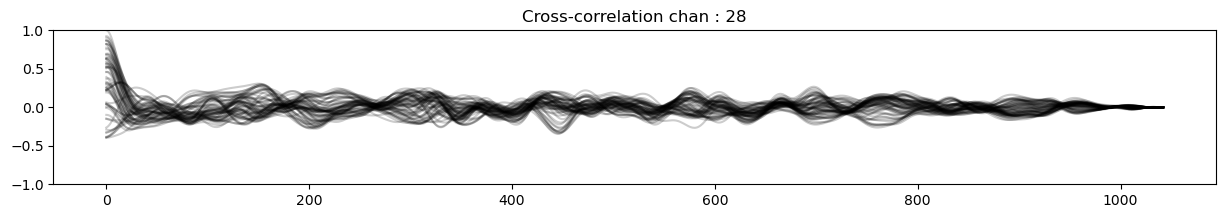

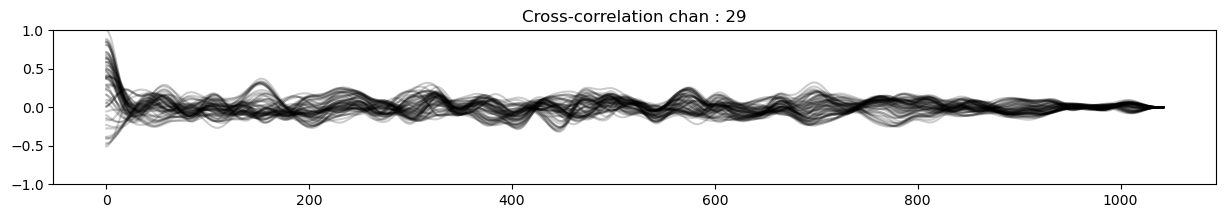

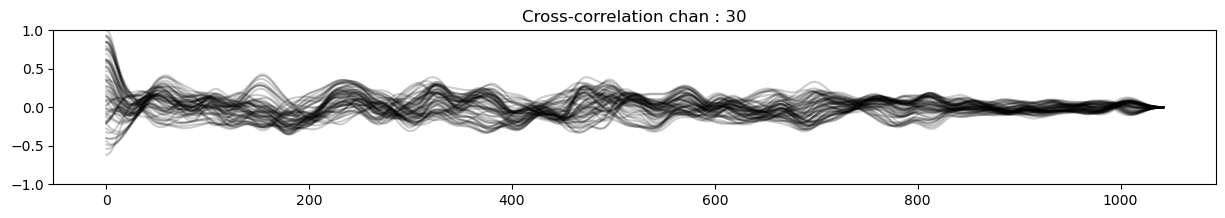

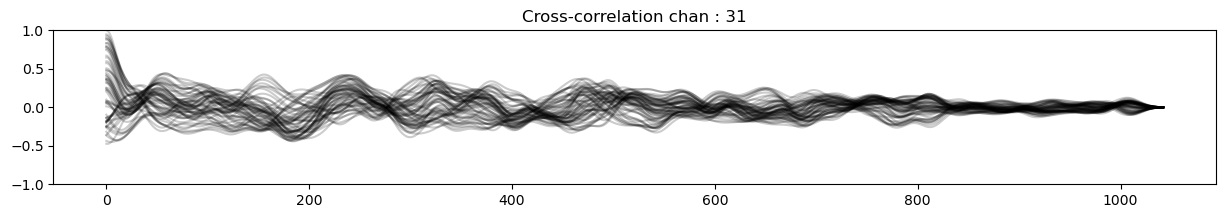

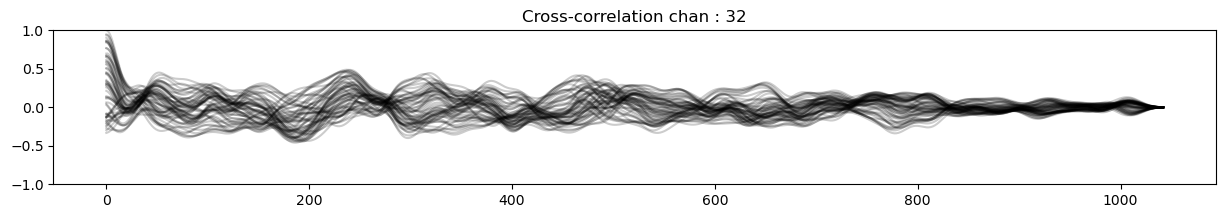

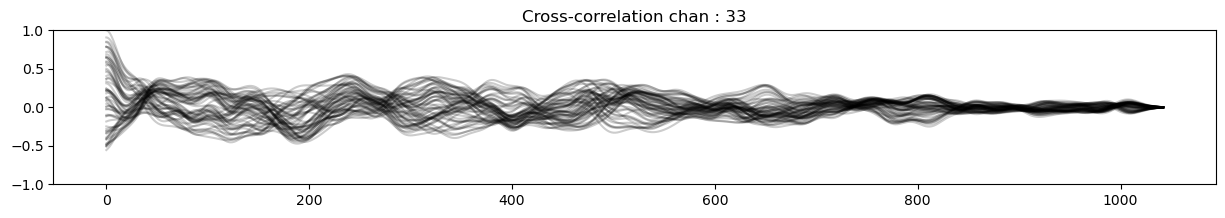

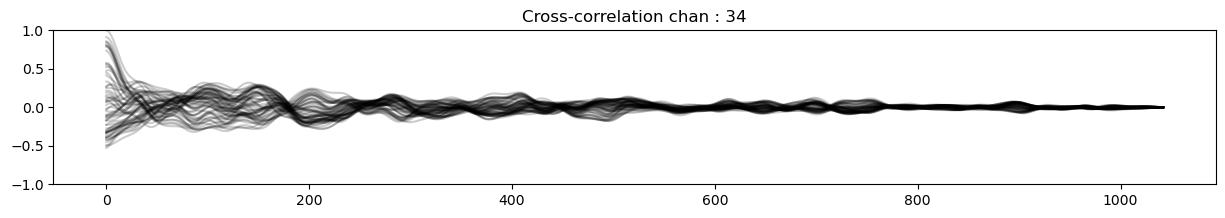

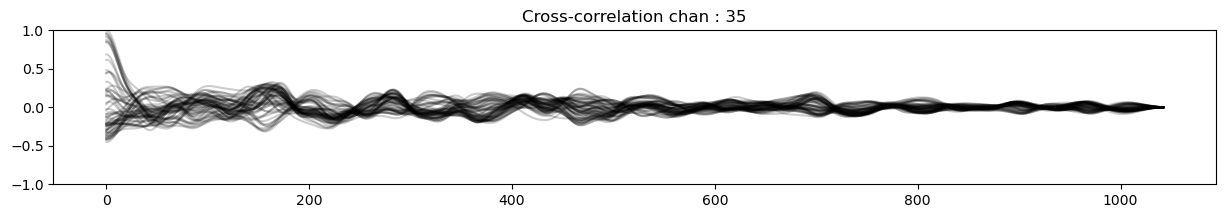

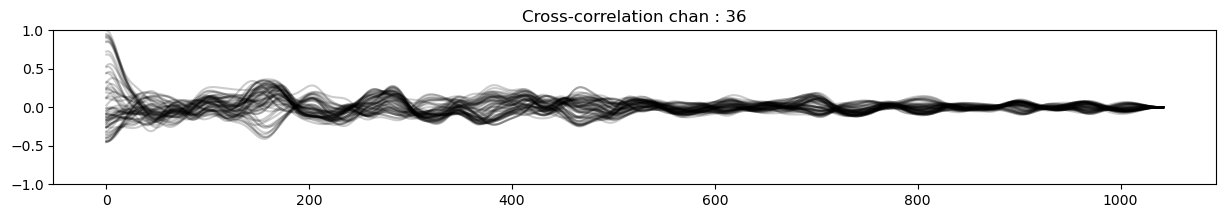

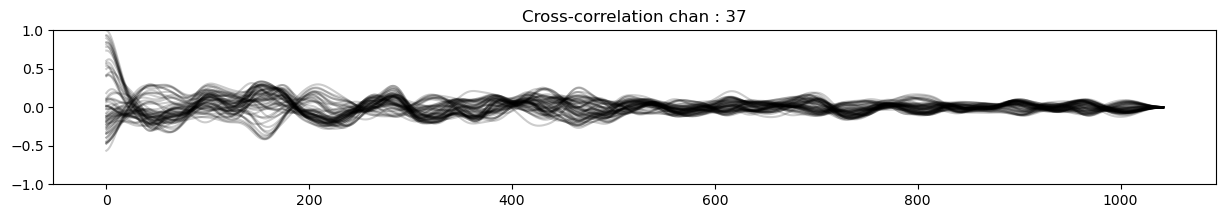

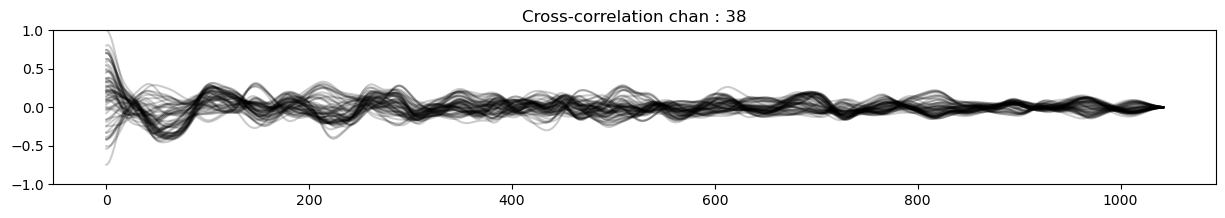

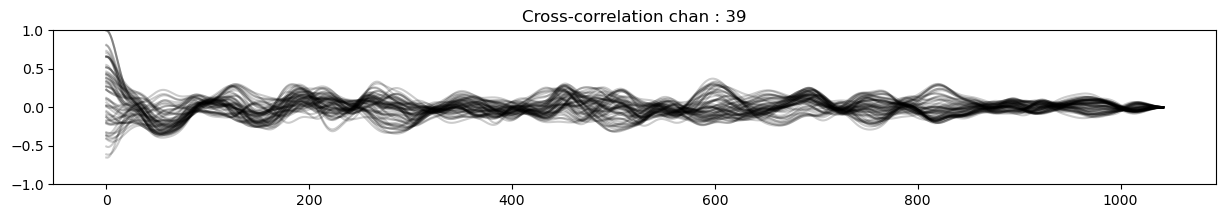

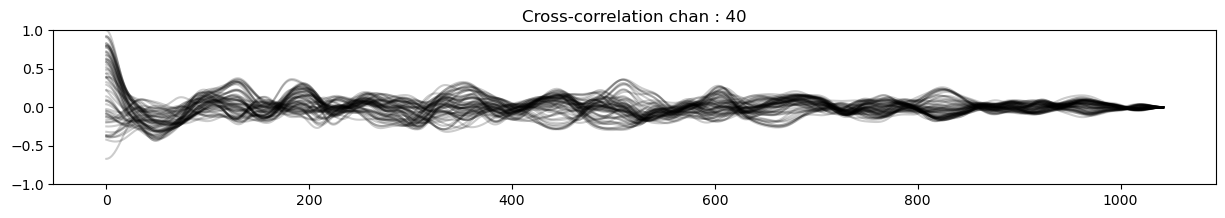

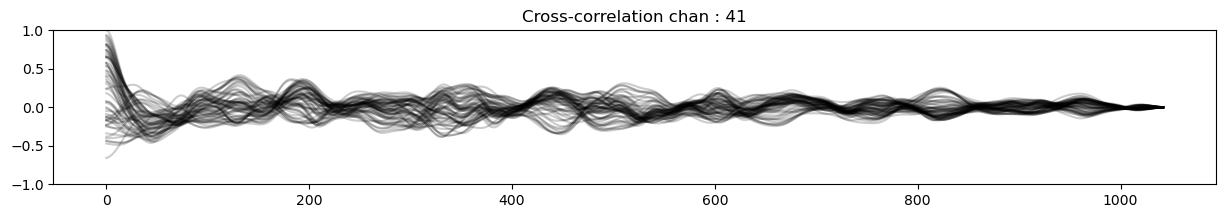

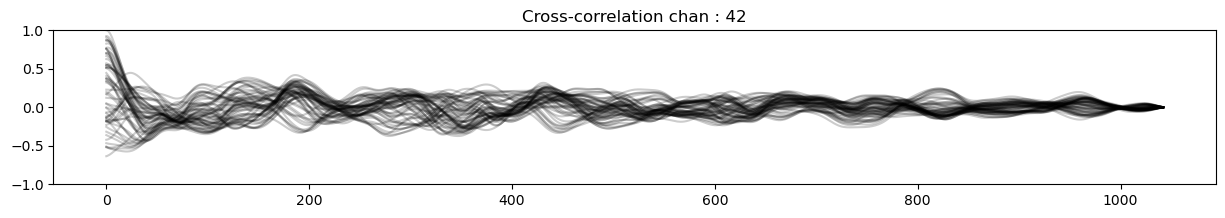

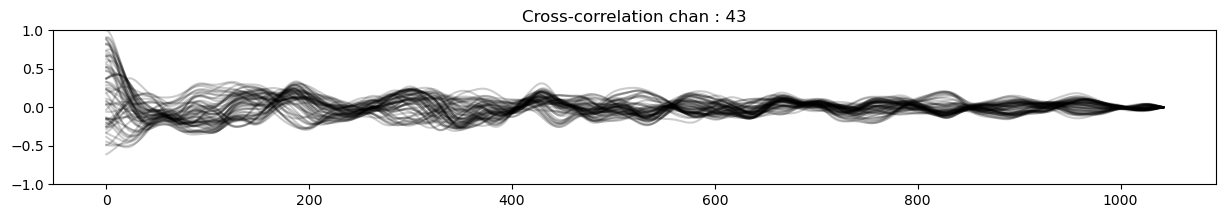

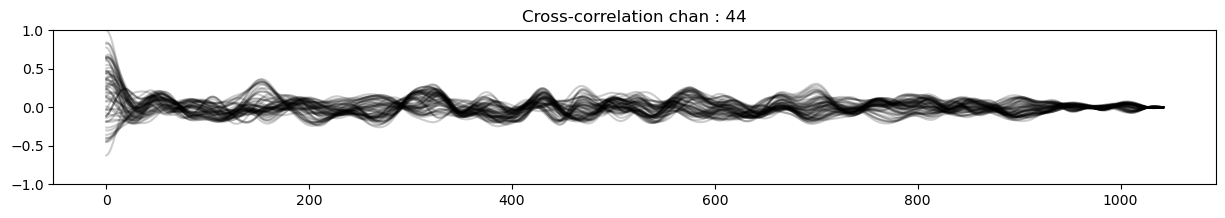

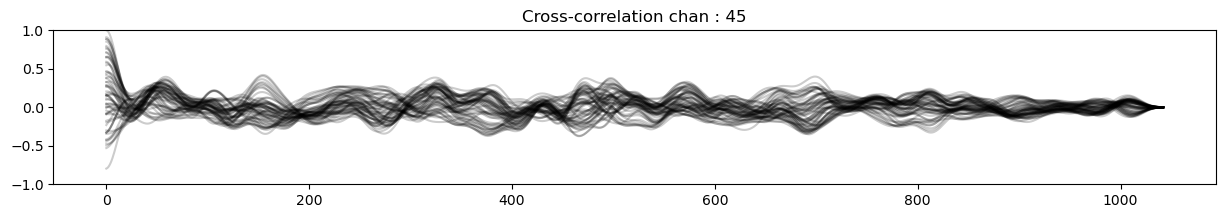

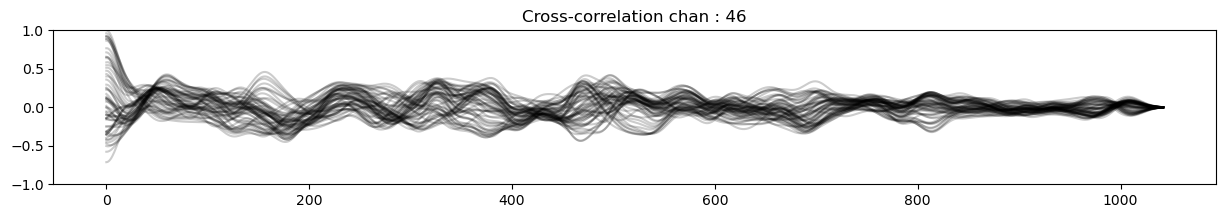

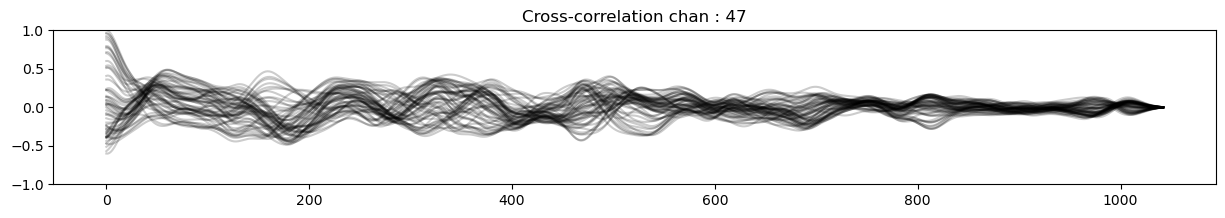

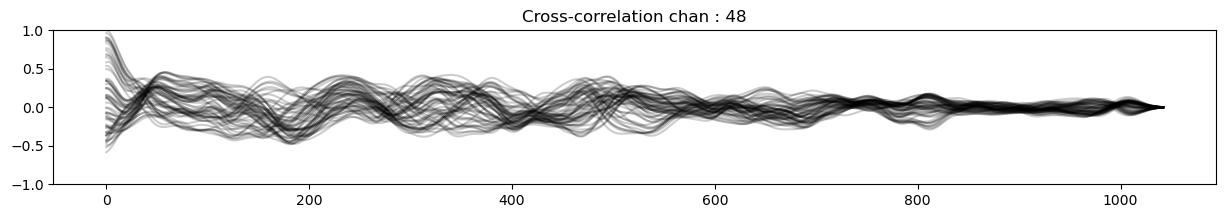

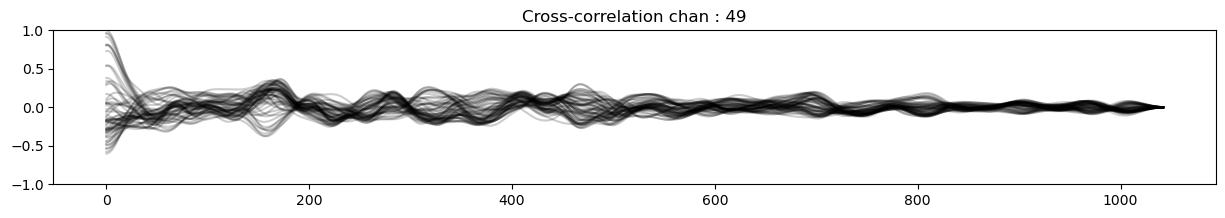

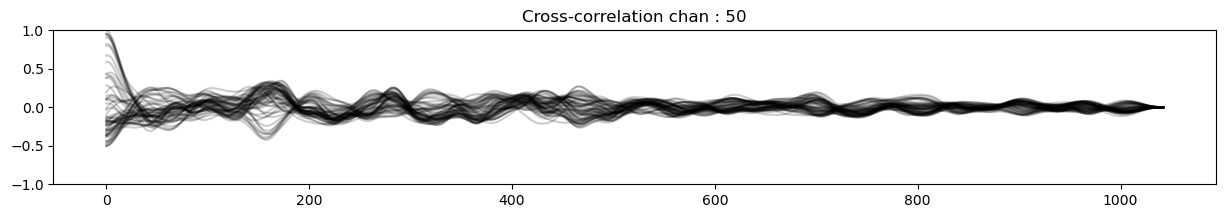

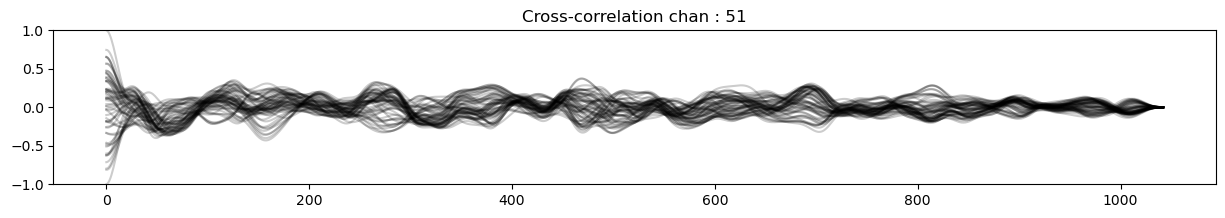

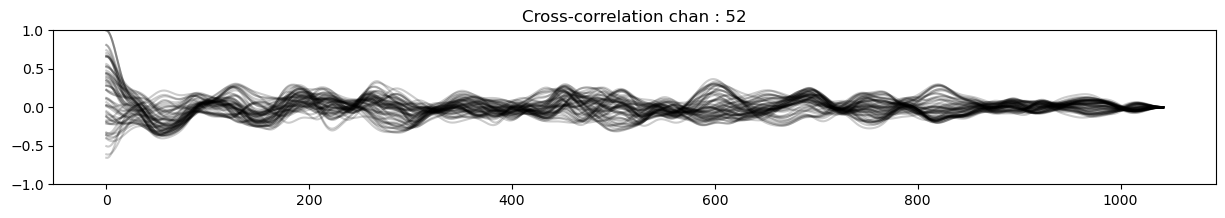

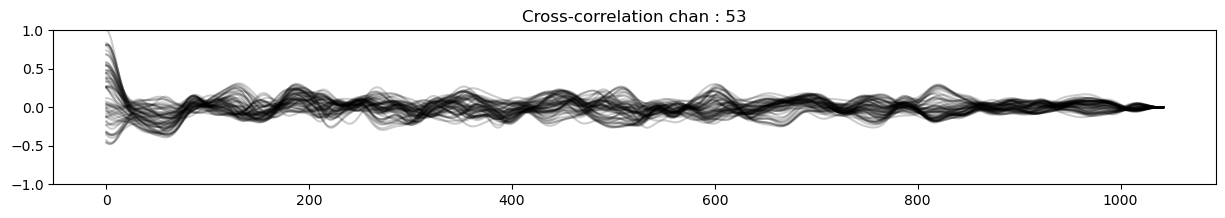

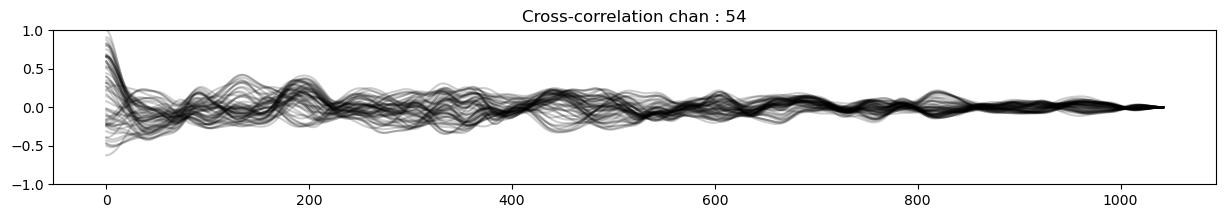

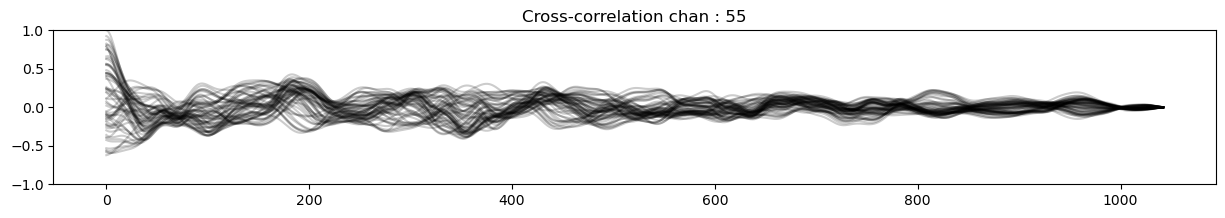

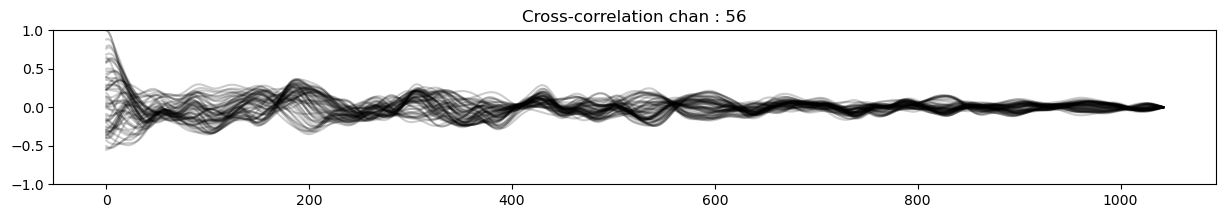

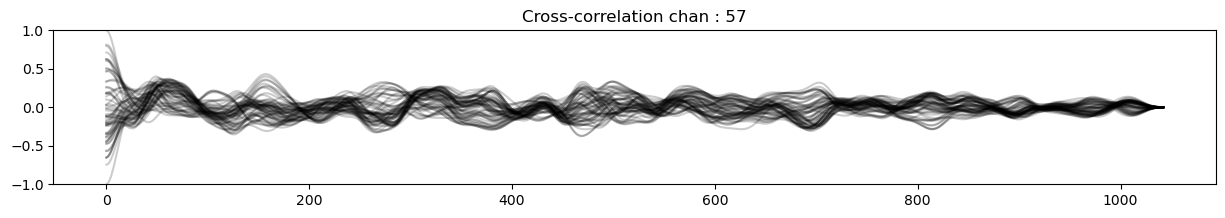

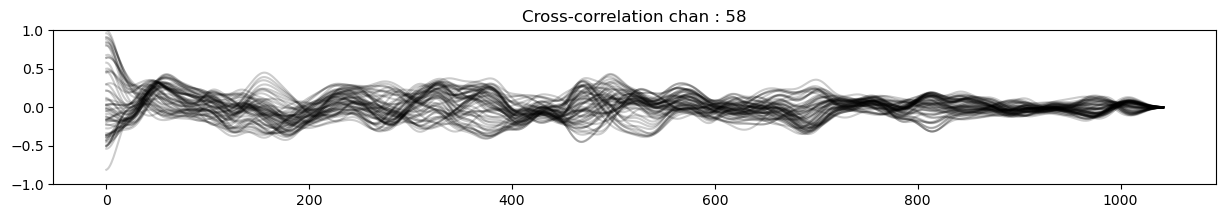

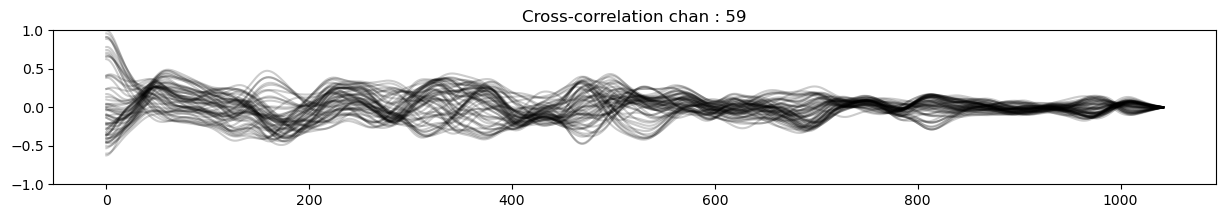

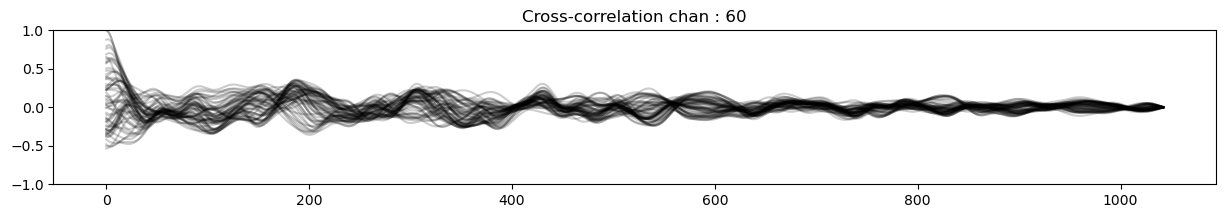

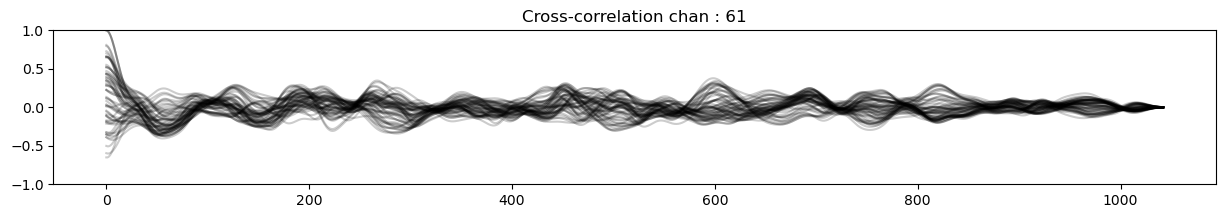

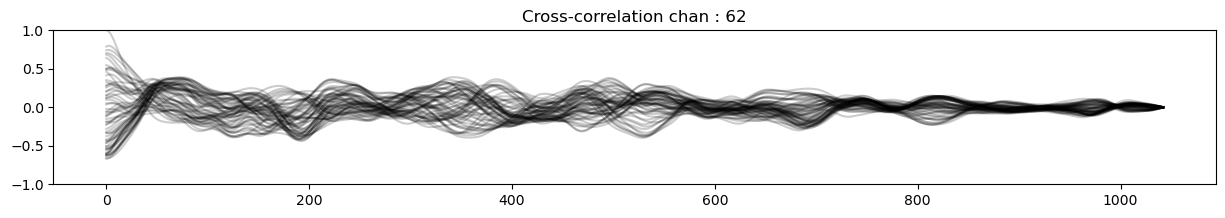

In [509]:
for chan in range(63):
    fig,ax = plt.subplots(figsize=(15, 2), sharex=True, sharey=True)
    for i in range(63):
        ax.plot(cross_corr_df[:,chan,i], 'k', alpha=0.2)
        ax.set_ylim(-1, 1)
        ax.set_title(f'Cross-correlation chan : {chan}')

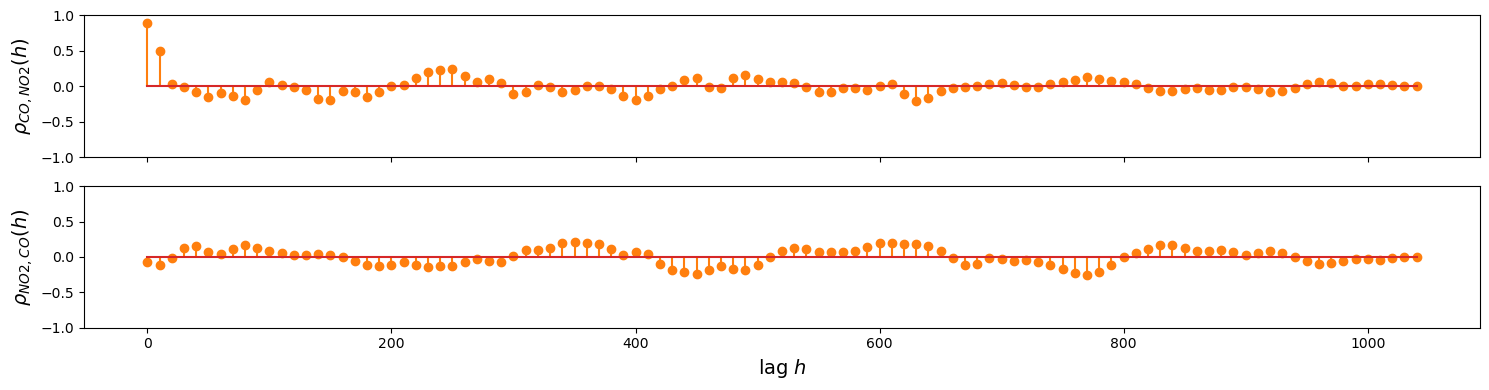

In [151]:
ccf_y1_y2 = ccf(df1[5],df1[15], unbiased=False)
ccf_y2_y1 = ccf(df1[0],df1[63], unbiased=False)
fig, ax = plt.subplots(2, figsize=(15, 4), sharex=True, sharey=True)
d=10
ax[0].stem(np.arange(len(df1.T.iloc[0]))[::d], ccf_y1_y2[::d], linefmt='C1-', markerfmt='C1o')
ax[1].stem(np.arange(len(df1.T.iloc[0]))[::d], ccf_y2_y1[::d], linefmt='C1-', markerfmt='C1o')
ax[-1].set_ylim(-1, 1)
ax[-1].set_xlabel('lag $h$', fontsize=14)
ax[0].set_ylabel(r'$\rho_{CO,NO2} (h)$', fontsize=14)
ax[1].set_ylabel(r'$\rho_{NO2,CO} (h)$', fontsize=14)
plt.tight_layout()
plt.show()

# Cluster electrodes

In [197]:
from sklearn import metrics
from sklearn.cluster import HDBSCAN

In [296]:
db = HDBSCAN(min_cluster_size=2,store_centers='both').fit(data_df.T)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 19
Estimated number of noise points: 12


In [306]:
_, indexes = np.unique(labels[db.probabilities_ == 1], return_index=True)
_, indexes = np.unique(labels, return_index=True)

In [308]:
labels

array([17,  6,  6, 18, 18, 17, 11,  2, -1,  5,  5,  3, 14, 14, 14, 14, -1,
       11, 11,  2, -1,  8,  8, -1,  3,  3, -1, 14, -1, 15, 15, 16, 16, -1,
       -1,  1,  9,  8, -1, 13,  3,  3,  7,  7, 15, 15,  4,  0,  0,  1,  9,
       -1, 13, 13, 12, 12, 10, -1,  4, -1, 10, 13])

In [320]:
np.isin(np.arange(len(labels)), indexes) | (labels == -1)

array([ True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False, False])

In [339]:
sel_data = data_df.iloc[:,np.isin(np.arange(len(labels)), indexes)]

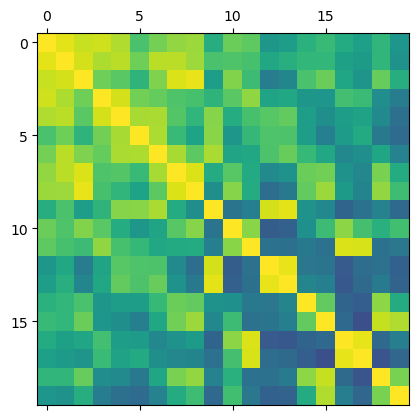

In [340]:
corr = np.corrcoef(sel_data.T)
im = plt.matshow(corr,aspect ='equal', vmin=-1, vmax=1)
plt.show()

# Test for stationarity

### KPSS test

In [342]:
test_stat, p_val = [], []
cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
for c in sel_data.columns: 
    kpss_res = kpss(sel_data[c].dropna(), regression='ct')
    test_stat.append(kpss_res[0])
    p_val.append(kpss_res[1])
    cv_1pct.append(kpss_res[3]['1%'])
    cv_2p5pct.append(kpss_res[3]['1%'])
    cv_5pct.append(kpss_res[3]['5%'])
    cv_10pct.append(kpss_res[3]['10%'])
kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 2.5%': cv_2p5pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=sel_data.columns).T
kpss_res_df.round(4)

0       1       3       6       7       8       9   \
Test statistic         0.0474  0.0421  0.0674  0.0677  0.0402  0.0827  0.0298   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           11      12     21      29      31      35      36  \
Test statistic         0.0664  0.0742  0.037  0.0938  0.0797  0.0651  0.0576   
p-value                0.1000  0.1000  0.100  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.216  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.216  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.146  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.119  0.1190  0.1190  0.1190  0.1190   

                           39      42      46      47     54      56  
Test statistic         0.0518  0.0686  0.0818  0.0654  0.064  0.0665  
p-value                0.1000  0.1000  0.1000  0.1000  0.100  0.1000  
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.216  0.2160  
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.216  0.2160  
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.146  0.1460  
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.119  0.1190

### Dickey fuller test

In [341]:
test_stat, p_val = [], []
cv_1pct, cv_5pct, cv_10pct = [], [], []
for c in sel_data.columns: 
    adf_res = adfuller(sel_data[c].dropna())
    test_stat.append(adf_res[0])
    p_val.append(adf_res[1])
    cv_1pct.append(adf_res[4]['1%'])
    cv_5pct.append(adf_res[4]['5%'])
    cv_10pct.append(adf_res[4]['10%'])
adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=sel_data.columns).T
adf_res_df.round(4)

0       1       3       6       7       8       9   \
Test statistic       -2.8888 -3.0319 -2.6666 -2.6621 -2.9819 -2.4216 -3.2581   
p-value               0.0467  0.0320  0.0800  0.0808  0.0366  0.1357  0.0169   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          11      12      21      29      31      35      36  \
Test statistic       -2.9674 -2.4862 -3.0474 -2.8174 -2.7128 -2.2830 -2.3263   
p-value               0.0381  0.1189  0.0307  0.0558  0.0718  0.1775  0.1636   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          39      42      46      47      54      56  
Test statistic       -4.5119 -3.8420 -2.4459 -2.5317 -4.3777 -4.0095  
p-value               0.0002  0.0025  0.1292  0.1079  0.0003  0.0014  
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368  
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644  
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683

In [53]:
stationary = adf_res_df.T['p-value'] < 0.05

array([ True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False])

In [11]:
data_df = data_df.T[stationary.values]
data_df.T.head(10)

NameError: name 'stationary' is not defined

# Split data in train and test sets

In [384]:
forecast_length = 20 
train_df, test_df = sel_data.iloc[:-forecast_length], sel_data.iloc[-forecast_length::]

In [385]:
train_df.shape

(1023, 20)

In [386]:
differenced_data = train_df.diff().dropna()

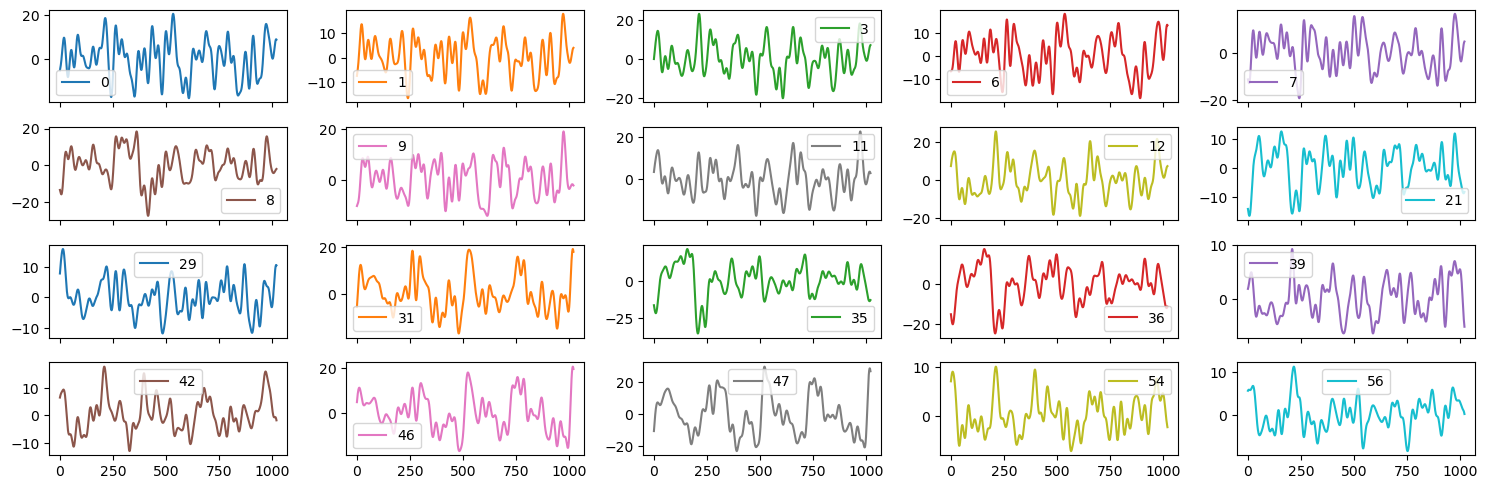

In [387]:
fig,ax = plt.subplots(4,5, figsize=(15, 5), sharex=True)
train_df.plot(ax=ax, subplots=True)
plt.xlabel('')
plt.tight_layout()
plt.show()

# Find the best number of lags

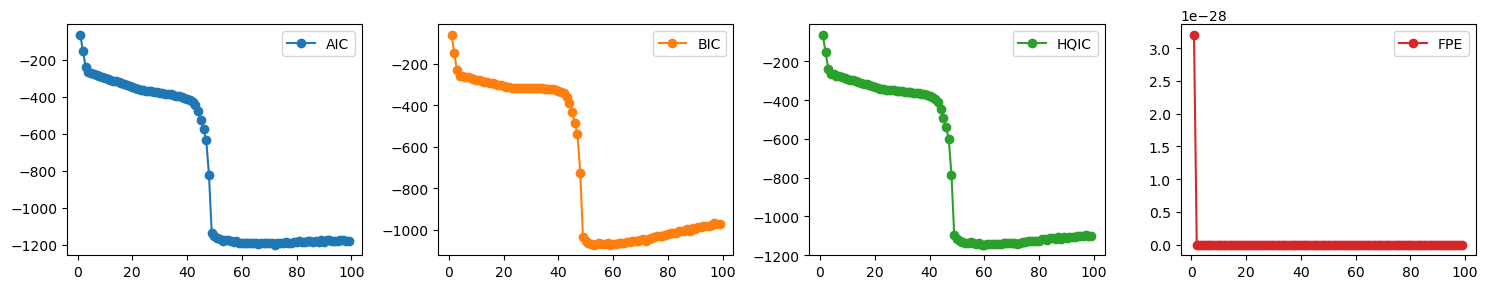

In [389]:
aic, bic, fpe, hqic = [], [], [], []
model = VAR(train_df) 
p = np.arange(1,100)
for i in p:
    result = model.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                'BIC': bic, 
                                'HQIC': hqic,
                                'FPE': fpe}, 
                               index=p)    
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.tight_layout()

# Train and fit the model

In [390]:
%%time
model = VAR(train_df) 
var_model = model.fit(42)

CPU times: user 2.01 s, sys: 84 ms, total: 2.09 s
Wall time: 319 ms


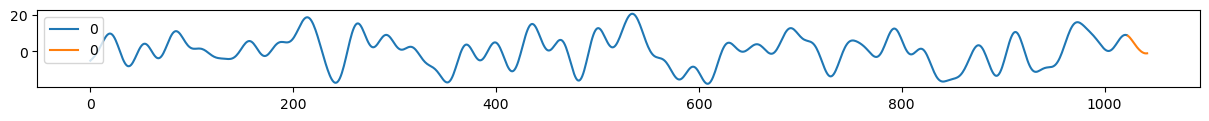

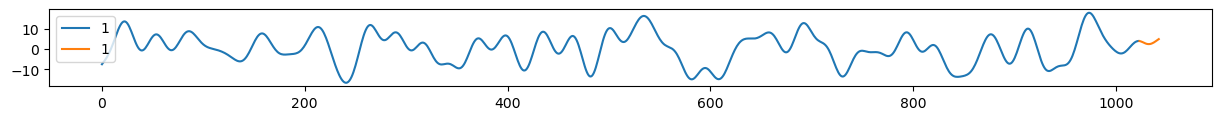

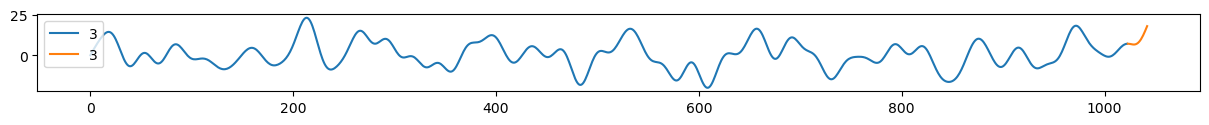

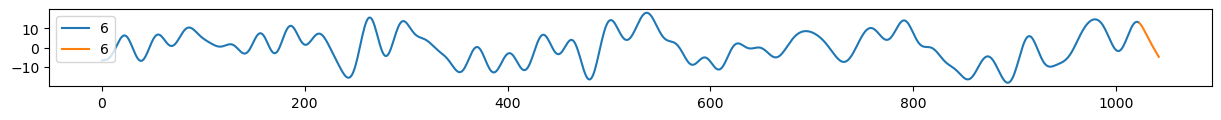

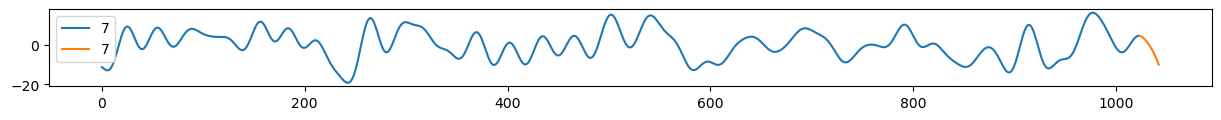

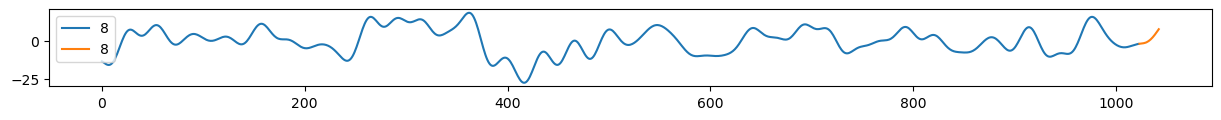

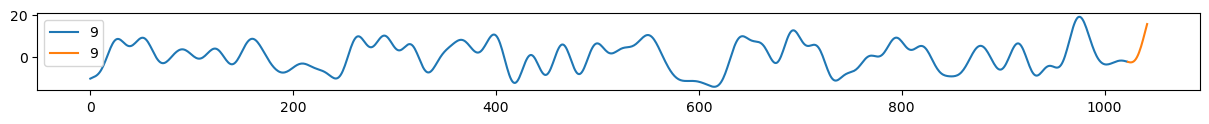

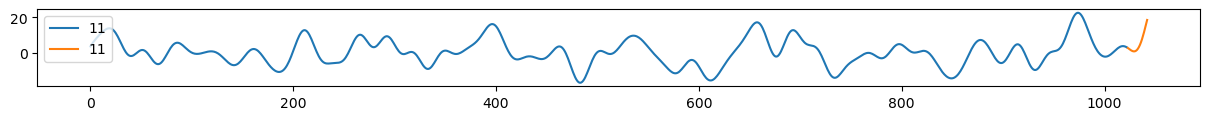

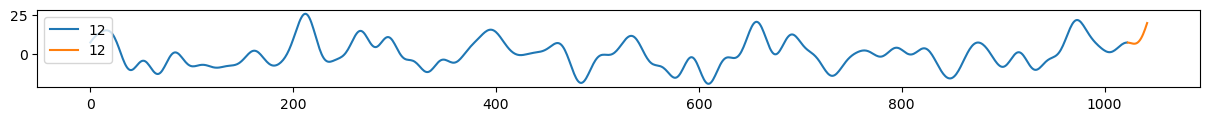

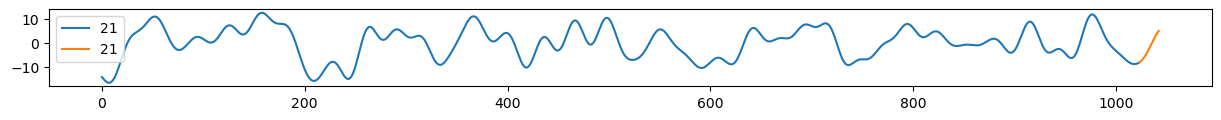

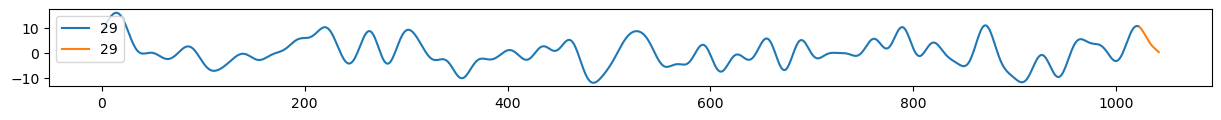

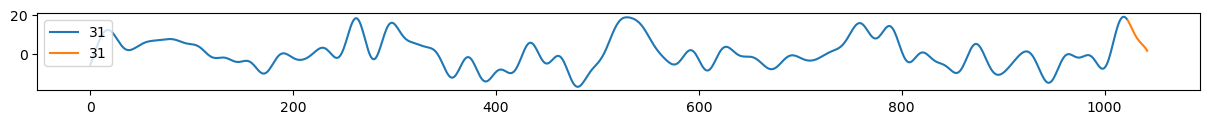

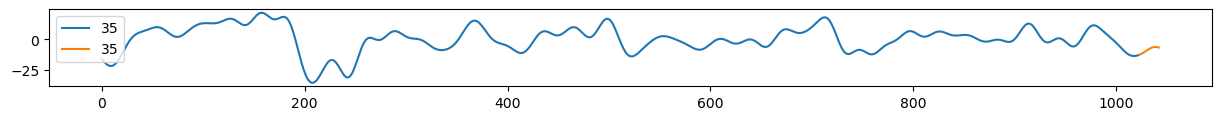

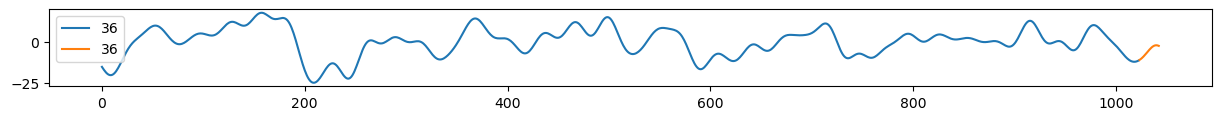

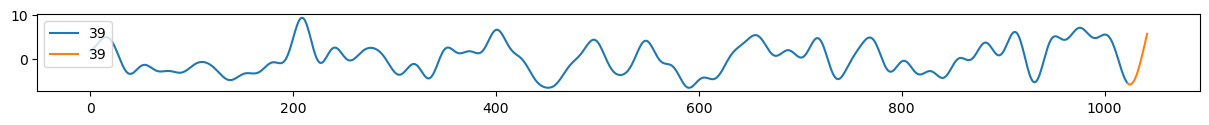

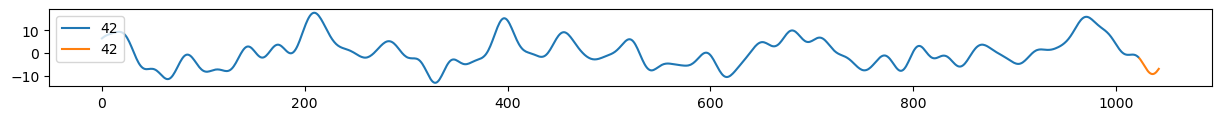

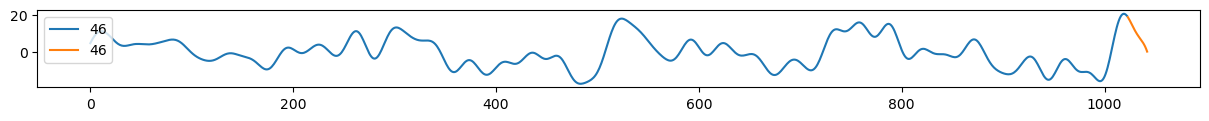

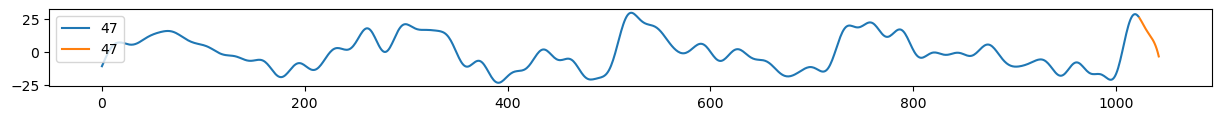

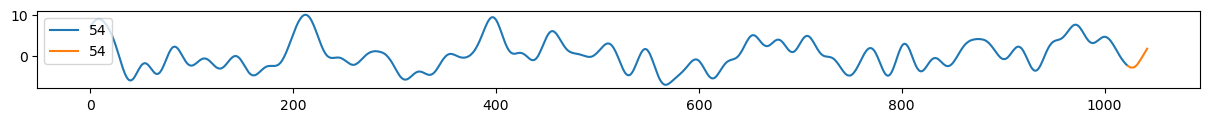

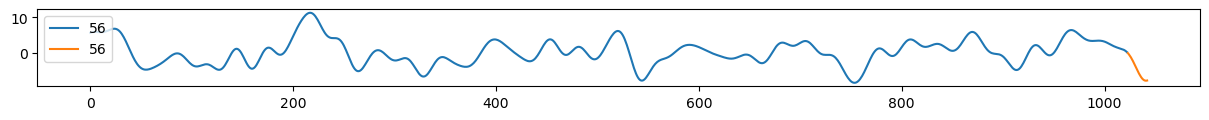

In [394]:
forecast_var = pd.DataFrame(var_model.forecast(train_df.values, 
                                              steps=forecast_length), 
                           columns=train_df.columns, 
                           index=test_df.index)
#forecast_var = forecast_var.rename(columns={c: c+'-VAR' for c in forecast_var.columns})
for c in train_df.columns:
    fig, ax = plt.subplots(figsize=[15, 1])
    pd.concat([train_df[c],forecast_var[c]],axis=1).plot(ax=ax)
    #plt.xlabel('')
    #plt.tight_layout()
    plt.legend(loc=2)
    plt.show()